In [4]:
from typing import TypedDict

class Port(TypedDict):
    total:float
    usd:float
    inr:float

In [10]:
def calc_usd(state:Port)->Port:
    state['usd']=state['total']*1.08
    return state

def calc_inr(state:Port)->Port:
    state['inr']=state['total']*90.0
    return state

In [13]:
from langgraph.graph import StateGraph, START, END

builder=StateGraph(Port)
builder.add_node("calc_usd",calc_usd)
builder.add_node("calc_inr",calc_inr)
builder.add_edge(START,"calc_usd")
builder.add_edge("calc_usd","calc_inr")
builder.add_edge("calc_inr",END)

graph=builder.compile()

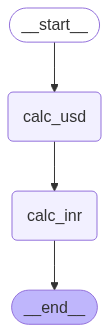

In [15]:
from IPython.display import  Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({'total': 1000.0})

{'total': 1000.0, 'usd': 1080.0, 'inr': 90000.0}